# I) Calcul Formel

In [2]:
import sympy
sympy.init_printing() 

In [3]:
from sympy import Function, Derivative, Eq, symbols
from sympkf import SymbolicPKF, t, PDESystem, Expectation

In [4]:
x, t = symbols('x t')
u = Function('u')(t, x)
c = Function('c')(t,x)

In [5]:
dynamics = [Eq(Derivative(c,t), u*Derivative(c,x)), Eq(Derivative(u,t),0)]
display(dynamics)

C:\Users\vince\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\vince\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\vince\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\vince\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBa

In [6]:
dynamics = PDESystem(dynamics)
dynamics

PDE System :
        prognostic functions : c(t, x), u(t, x)
        constant functions   : 
        exogeneous functions : 
        constants            : 
        

In [7]:
pkf_advection = SymbolicPKF(dynamics)

In [8]:
for equation in pkf_advection.in_metric:
    display(equation)

                         ∂                                                    
              V_cu(t, x)⋅──({V_{c}}(t, x))                                    
∂                        ∂x                          ∂               _________
──(c(t, x)) = ──────────────────────────── + u(t, x)⋅──(c(t, x)) + ╲╱ {V_{c}}(
∂t                  2⋅{V_{c}}(t, x)                  ∂x                       

                                                                              
                                                                              
______   _______________            ⎛                           ∂             
t, x) ⋅╲╱ {V_{u}}(t, x) ⋅Expectation⎜{\varepsilon_{u}}(t, x, ω)⋅──({\varepsilo
                                    ⎝                           ∂x            

                 
                 
                ⎞
n_{c}}(t, x, ω))⎟
                ⎠

                                    ∂                                         
                 V_cu(t, x)⋅u(t, x)⋅──({V_{c}}(t, x))                         
∂                                   ∂x                            ____________
──(V_cu(t, x)) = ──────────────────────────────────── + u(t, x)⋅╲╱ {V_{c}}(t, 
∂t                         2⋅{V_{c}}(t, x)                                    

                                                                              
                                                                              
___   _______________            ⎛                           ∂                
x) ⋅╲╱ {V_{u}}(t, x) ⋅Expectation⎜{\varepsilon_{u}}(t, x, ω)⋅──({\varepsilon_{
                                 ⎝                           ∂x               

                                          
                                          
             ⎞                 ∂          
c}}(t, x, ω))⎟ + {V_{u}}(t, x)⋅──(c(t, x))
             ⎠                 ∂x   

                                                                              
                                                                              
                                                       ∂                      
                         2⋅V_cu(t, x)⋅{g_{c,xx}}(t, x)⋅──(c(t, x))            
∂                                                      ∂x                    ∂
──({g_{c,xx}}(t, x)) = - ───────────────────────────────────────── + u(t, x)⋅─
∂t                                     {V_{c}}(t, x)                         ∂
                                                                              

                                                                              
                                                           _______________    
                                                       2⋅╲╱ {V_{u}}(t, x) ⋅Exp
                                                                              
                                         ∂         

In [22]:
pkf_advection.in_metric[0].args[1]

⎛  _______________    _______________             ⎛                           
⎜╲╱ {V_{c}}(t, x) , ╲╱ {V_{u}}(t, x) , Expectation⎜{\varepsilon_{u}}(t, x, ω)⋅
⎝                                                 ⎝                           

∂                             ⎞⎞
──({\varepsilon_{c}}(t, x, ω))⎟⎟
∂x                            ⎠⎠

In [333]:
for key, value in pkf_advection.subs_tree.items():
    display({key:value})

⎧           ⎛                                2⎞                  ⎫
⎪           ⎜⎛∂                             ⎞ ⎟                  ⎪
⎨Expectation⎜⎜──({\varepsilon_{c}}(t, x, ω))⎟ ⎟: {g_{c,xx}}(t, x)⎬
⎪           ⎝⎝∂x                            ⎠ ⎠                  ⎪
⎩                                                                ⎭

⎧                                                                             
⎪           ⎛                                 2                            ⎞  
⎪           ⎜∂                               ∂                             ⎟  
⎨Expectation⎜──({\varepsilon_{c}}(t, x, ω))⋅───({\varepsilon_{c}}(t, x, ω))⎟: 
⎪           ⎜∂x                               2                            ⎟  
⎪           ⎝                               ∂x                             ⎠  
⎩                                                                             

∂                   ⎫
──({g_{c,xx}}(t, x))⎪
∂x                  ⎪
────────────────────⎬
         2          ⎪
                    ⎪
                    ⎭

In [334]:
for term in pkf_advection.unclosed_terms:
    display(term)

           ⎛∂                              ∂                             ⎞
Expectation⎜──({\varepsilon_{c}}(t, x, ω))⋅──({\varepsilon_{u}}(t, x, ω))⎟
           ⎝∂x                             ∂x                            ⎠

           ⎛                           ∂                             ⎞
Expectation⎜{\varepsilon_{u}}(t, x, ω)⋅──({\varepsilon_{c}}(t, x, ω))⎟
           ⎝                           ∂x                            ⎠

In [335]:
for equation in pkf_advection._epsilon_system:
    display(equation)

                                                                         ∂    
                                   V_cu(t, x)⋅{\varepsilon_{c}}(t, x, ω)⋅──(Ex
∂                                                                        ∂x   
──({\varepsilon_{c}}(t, x, ω)) = - ───────────────────────────────────────────
∂t                                                           {V_{c}}(t, x)    
                                                                              

                                                                              
pectation(c(t, x, ω)))                                                        
                                                 ∂                            
────────────────────── + Expectation(u(t, x, ω))⋅──({\varepsilon_{c}}(t, x, ω)
                                                 ∂x                           
                                                                              

      _______________                            ∂

# II) Eperience numérique

## Initialisation des champs moyens

**Definition du domaine physique**

In [336]:
from sympy import Integer
from sympkf import FDModelBuilder

g = pkf_advection.fields[u].metric[0] # metric tensor
s = pkf_advection.fields[u].aspect[0] # aspect tensor

# loc. Gaussian closure of P18 in metric form, then in aspect form
P18_closure = Integer(3)*g**Integer(2)-Integer(2)*Derivative(g,x,2)
P18_closure = P18_closure.subs(g,1/s).doit().expand()

# Introduction of the closure as a dictionnary
unclosed_term = list(pkf_advection.unclosed_terms)[0]
pkf_advection.set_closure({unclosed_term:P18_closure})

# Build a numerical code at runtime
exec(FDModelBuilder(pkf_advection.in_aspect, class_name='ClosedPKFAdvection').code)
closed_pkf_advection = ClosedPKFAdvection(shape=(241,))

In [337]:
import matplotlib.pyplot as plt

In [338]:
def plot_results(data, label=None, labelx=True, title=None, save_file=None, normalisation=None, 
                 selected_times=None,style=None, name=None, alpha=1., bolds=[0., 1.]):
    
    normalisation = 1. if normalisation is None else normalisation
                 
    selected_times = [time for time in data] if selected_times is None else selected_times
                 
    style = 'k' if style is None else style
                 
    for time in selected_times:
        lalpha = alpha if time in bolds else 0.2
        lname = name if time==selected_times[-1] else None
        plt.plot(domain.x[0],data[time]/normalisation, style, alpha = lalpha, label=lname)
                 
    if labelx:
        plt.xlabel('$x/D$', fontsize=15)
    if label:
        plt.ylabel(label, fontsize=15)
    if title:
        plt.title(title)
    if save_file:
        plt.savefig(save_file)

In [339]:
domain = closed_pkf_advection

In [340]:
n = domain.shape[0]
domain.shape, domain.lengths

**initialisation des champs**

In [341]:
# initialisation du champs U
Umax = 0.5
U = np.array(n*[Umax])

# initialisation du champs c
cmax = 1
c0 = cmax*( 1+np.cos(2*np.pi/ domain.lengths[0]  *(domain.x[0]-0.25)) ) *0.5

# initialisation de la Variance
Vc0 = np.array([(0.01*cmax)**2]*n)
Vu0 = np.array([(0.01*Umax)**2]*n)
Vcu = np.sqrt(Vc0*Vu0)


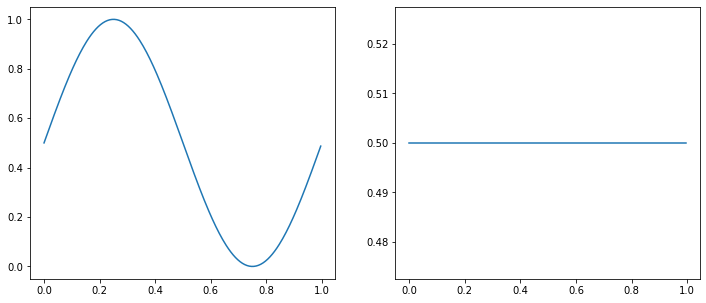

In [342]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(domain.x[0], c0)
plt.subplot(122)
plt.plot(domain.x[0], U)

## Ensembliste

### 1) creation des erreurs

**Definition des covariances**

In [382]:
from scipy.linalg import sqrtm

lhc = 0.04
lhu = 0.04


def matrix_correlation(lhc, lhu):
    gauss_c = lambda dx : np.exp(-0.5*dx**2/lhc**2)
    gauss_u = lambda dx : np.exp(-0.5*dx**2/lhu**2)
    gauss_cu = lambda dx : np.exp(-0.5*dx**2/(lhu*lhc))
    
    g = []
    
    gc = gauss_c(domain.x[0]-domain.x[0][domain.shape[0]//2])
    gu = gauss_u(domain.x[0]-domain.x[0][domain.shape[0]//2])
    gcu = gauss_cu(domain.x[0]-domain.x[0][domain.shape[0]//2])
    
    dx = domain.x[0][1]
    n = domain.shape[0]
    
    correlation = np.zeros((2*n,2*n))
    
    for i in range(n):
        correlation[i][0:domain.shape[0]] = np.roll(gc, domain.shape[0]//2-i)
        correlation[i][domain.shape[0]:] = np.roll(gcu, domain.shape[0]//2-i)
    for i in range(n,2*n):
        correlation[i][0:domain.shape[0]] = np.roll(gcu, domain.shape[0]//2-i)
        correlation[i][domain.shape[0]:] = np.roll(gu, domain.shape[0]//2-i)
    return correlation

correlation = matrix_correlation(lhc, lhu)
std_correlation = np.real(sqrtm(correlation))

# print(std_correlation.dot(std_correlation)-correlation)
print(std_correlation)


def make_sample():
    
    zeta = np.array([np.random.normal(size=domain.shape[0]*2)])
    
    ef = np.dot(std_correlation, zeta.T).T
    
    ef_c = ef[0][0:n]
    ef_u = ef[0][n:]
    
    return [ef_c,ef_u]

def make_error_ensemble(variance, Ne):
    return np.array([np.concatenate((make_sample()[0],make_sample()[1])) for k in range(Ne)])

def make_init_ensemble(mean, variance, ef):
    return (mean[0] + np.sqrt(variance[0])*ef[0], mean[1] + np.sqrt(variance[1])*ef[1])

[[0.20234208 0.19805676 0.18975654 ... 0.18975653 0.19805675 0.20234203]
 [0.19805675 0.19404185 0.18625405 ... 0.18625405 0.19404182 0.19805675]
 [0.18975651 0.18625405 0.17943888 ... 0.17943884 0.18625405 0.18975654]
 ...
 [0.18975653 0.18625404 0.17943884 ... 0.17943886 0.18625405 0.18975653]
 [0.19805677 0.19404177 0.18625406 ... 0.18625405 0.19404183 0.19805675]
 [0.20234201 0.19805678 0.1897565  ... 0.18975653 0.19805675 0.20234206]]


(241,) (241,)


Text(0.5, 1.0, 'Homogenous correlation_cu function')

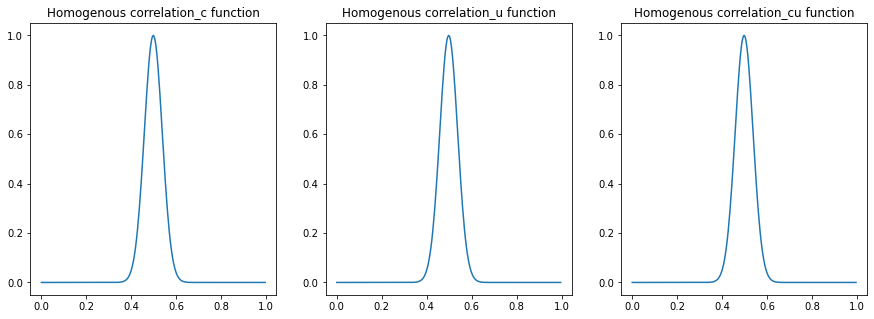

In [383]:
sample = make_sample()
sample_c = sample[0]
sample_u = sample[1]

print(sample_c.shape, sample_u.shape)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(domain.x[0], correlation[0:n][n//2][0:n])
plt.title('Homogenous correlation_c function')
plt.subplot(132)
plt.plot(domain.x[0], correlation[n:][n//2][n:])
plt.title('Homogenous correlation_u function')
plt.subplot(133)
plt.plot(domain.x[0], correlation[n:][n//2][0:n])
plt.title('Homogenous correlation_cu function')


**example d'erreur**

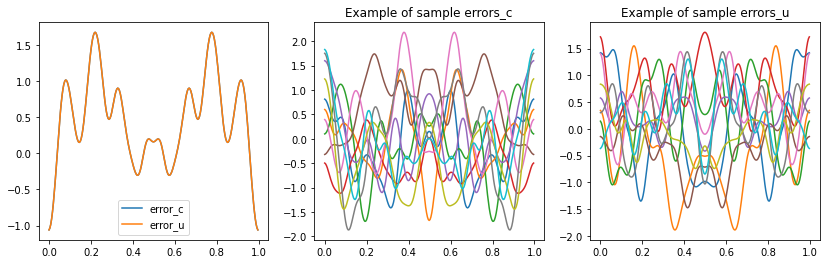

In [384]:
error_c = sample_c
error_u = sample_u

plt.figure(figsize=(14,4))
plt.subplot(131)
plt.plot(domain.x[0], error_c)
plt.plot(domain.x[0], error_u)
plt.legend(["error_c","error_u"])

K = 10 # nombre de membre

plt.subplot(132)
for i in range(K):
    plt.plot(domain.x[0], make_sample()[0])
plt.title("Example of sample errors_c")

plt.subplot(133)
for i in range(K):
    plt.plot(domain.x[0], make_sample()[1])
plt.title("Example of sample errors_u");

### 2) création de l'ensemble

In [385]:
Ne = 1000

V = [Vc0.max(), Vu0.max()]
mean = [c0, U]

ef = make_error_ensemble(V, Ne)

# [ensemble_c, ensemble_u] = make_init_ensemble(mean, V,  ef)

In [386]:
ef.shape

C:\Users\vince\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\vince\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\vince\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\vince\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBa

**plot d'un membre de l'ensemble**

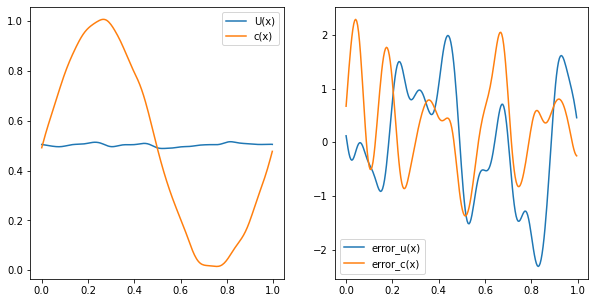

In [387]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(domain.x[0], U_ensemble[100])
plt.plot(domain.x[0], c_ensemble[100])
plt.legend(["U(x)", "c(x)"])
plt.subplot(122)
plt.plot(domain.x[0], ef_c[100])
plt.plot(domain.x[0], ef_u[100])
plt.legend(["error_u(x)", "error_c(x)"])

**validation de l'ensemble**

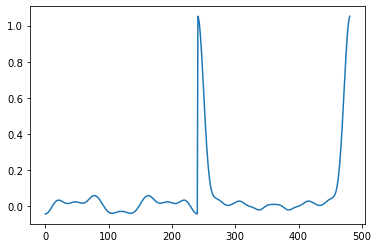

In [392]:
plt.plot(((ef.T @ ef)/Ne)[241])

## forecast

In [ ]:
# Build a numerical code at runtime
exec(FDModelBuilder(dynamics, class_name='Advection').code)
num_advection = Advection(shape=(241,))

In [ ]:
ensemble_forecast = num_advection.ensemble_forecast